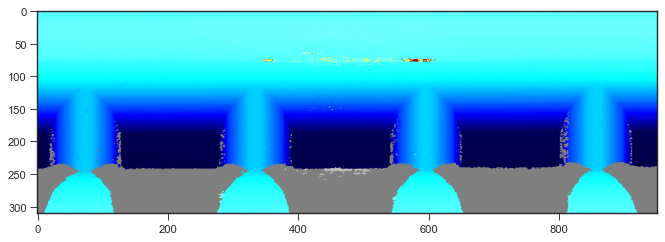

In [16]:
import numpy as np
import cv2 as cv
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import os
import math
from skimage import data
from skimage.filters import threshold_otsu
from matplotlib import style
style.use('seaborn-ticks')

from tkinter_dialog_custom import askopenfilename

#path_img = askopenfilename(title="Select 3D scan file", filetypes =[('PNG files', '*.png')])
path_img = r"Z:/Dane TCM/skany 3D/20_26.png"

im = cv.imread(path_img)
im = cv.cvtColor(im, cv.COLOR_BGR2RGB)

plt.figure(figsize = (10, 6), dpi=80)
plt.imshow(im)
plt.show()


# Tooth extraction

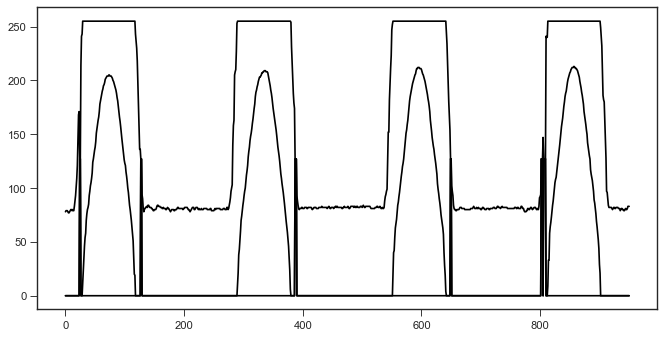

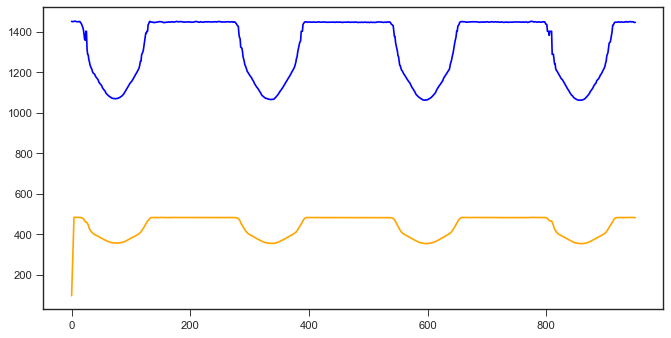

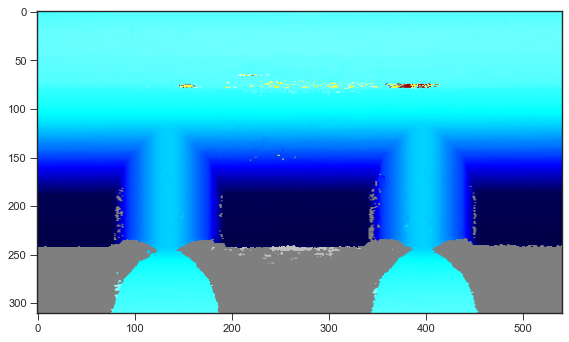

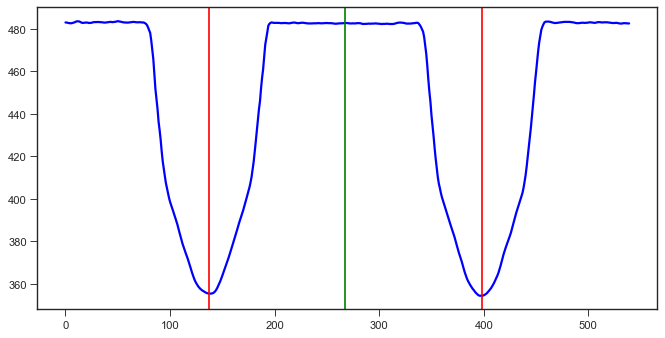

137 398


In [17]:

# Transform data to extract tooth z-height shape

# Plot reference line
reference_line = im[200,:]
plt.figure(figsize = (10, 5), dpi=80)
plt.plot(reference_line, color="black")
plt.show()

# Transform data from 3d scan
section = []
for i,val in enumerate(reference_line):
    r,g,b = reference_line[i]
    if(r>0):
        r=0
        b=0
    
    if(r == 255 or b == 0 and g == 0):
        section.append(int(r) + int(g) + int(b))  
    else:
        section.append(6*255 - r - g - b)

# Filter signal
from scipy.signal import lfilter
n = 5  # the larger n is, the smoother the curve will be
b = [1.0 / n] * n
a = 3
section_filtered = lfilter(b,a,section)

# Plot new data
plt.figure(figsize = (10, 5), dpi=80)
plt.plot(section, color='blue')
plt.plot(section_filtered, color='orange')
plt.show()

section = section_filtered

# Crop image
im = im[:,200:740]
plt.figure(figsize = (10, 5), dpi=80)
plt.imshow(im)
plt.show()

# Crop data
section = section[200:740]
section1 = section[0:270]
section2 = section[270:540]
border = np.argmin(section1), np.argmin(section2)+270
split = int((border[0]+border[1])/2)

plt.figure(figsize = (10, 5), dpi=80)
plt.plot(section, linewidth=2, linestyle="-", color="blue")  # smoothed by filter
plt.axvline(x=border[0], color='red')
plt.axvline(x=border[1], color='red')
plt.axvline(x=split, color='green')
plt.show()

print(border[0],border[1])



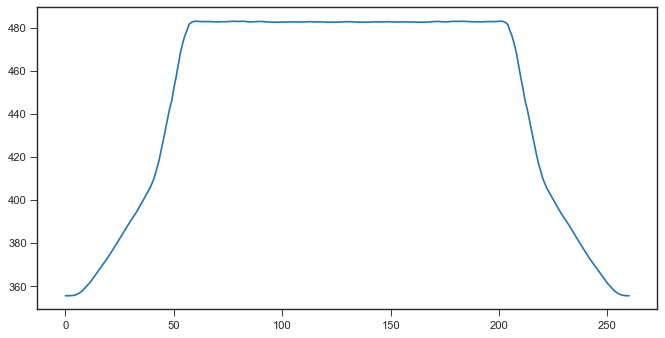

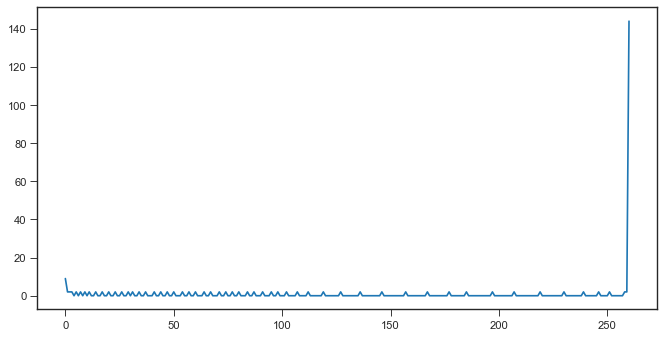

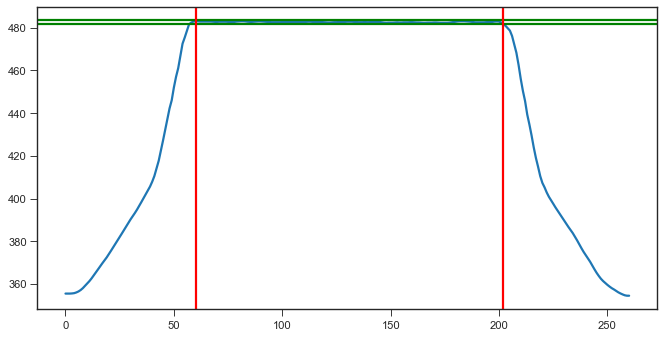

In [18]:

values = []
true_values = []
for i in range(0,border[1]-border[0]):
    true_values.append(section[border[0]+i])
    if(section[border[0]+i] > section[border[1]-i]):
        values.append(section[border[0]+i])
    else:
        values.append(section[border[1]-i])

plt.figure(figsize = (10, 5), dpi=80)
plt.plot(values)
plt.show()

combine_hist = 1
hist, bins = np.histogram(values, bins = int(len(values)/combine_hist))

plt.figure(figsize = (10, 5), dpi=80)
plt.plot(hist)

roof = np.where(hist==(max(hist)))[0][0]
roof = bins[roof]
offest = 1
start, stop = 0, 0
for i in range(len(values)):
    if values[i]>roof-offest: 
        start = i+3
        break
for i in range(len(values)):
    if values[len(values)-i-1]>roof-offest: 
        stop = len(values)-i-3
        break

plt.figure(figsize = (10, 5), dpi=80)
plt.plot(true_values,linewidth=2)  
plt.axhline(y=roof-offest,c='g',linewidth=2)
plt.axhline(y=roof+offest,c='g',linewidth=2)
plt.axvline(x=start,c='r',linewidth=2)
plt.axvline(x=stop,c='r',linewidth=2)
plt.show()

start_x = start+border[0]
stop_x = stop+border[0]

In [19]:
'''
tooth_top = true_values[start:stop]
figure(figsize = (10, 5), dpi=80)
plt.plot(tooth_top,linewidth=2)  
plt.axhline(y=roof,c='g',linewidth=2)

tooth_top = tooth_top - roof
figure(figsize = (10, 5), dpi=80)
plt.grid()
plt.plot(tooth_top,linewidth=2)  
plt.axhline(y=-0.5,c='m',linewidth=2)
plt.axhline(y=min(tooth_top),c='r',linewidth=2)

failure_max_depth = min(tooth_top)
failure_width = tooth_top
'''

"\ntooth_top = true_values[start:stop]\nfigure(figsize = (10, 5), dpi=80)\nplt.plot(tooth_top,linewidth=2)  \nplt.axhline(y=roof,c='g',linewidth=2)\n\ntooth_top = tooth_top - roof\nfigure(figsize = (10, 5), dpi=80)\nplt.grid()\nplt.plot(tooth_top,linewidth=2)  \nplt.axhline(y=-0.5,c='m',linewidth=2)\nplt.axhline(y=min(tooth_top),c='r',linewidth=2)\n\nfailure_max_depth = min(tooth_top)\nfailure_width = tooth_top\n"

# Tooth extraction cd

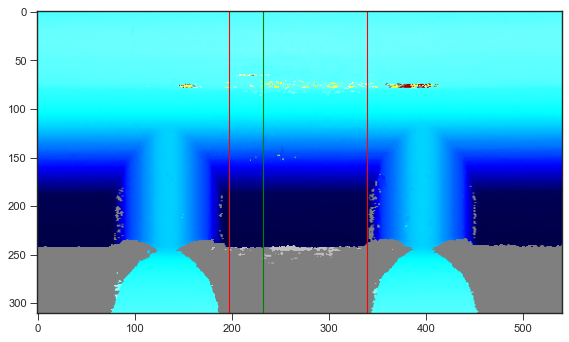

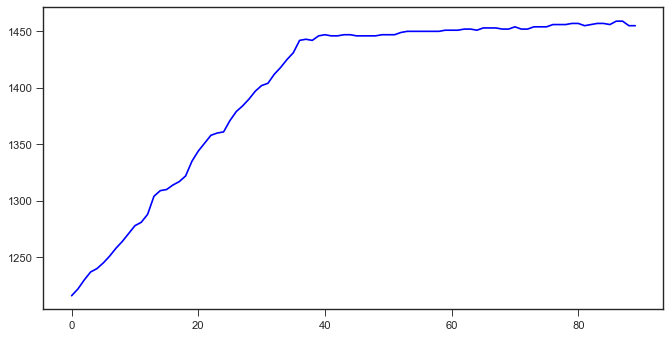

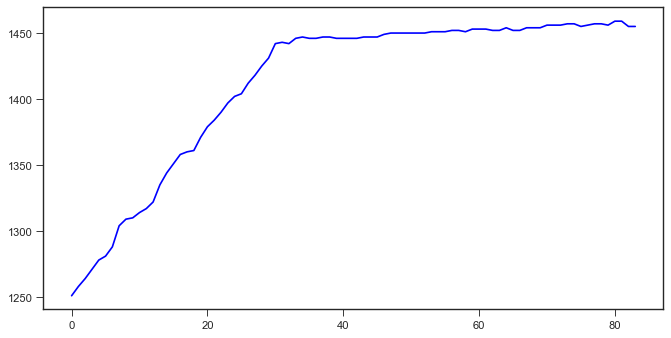

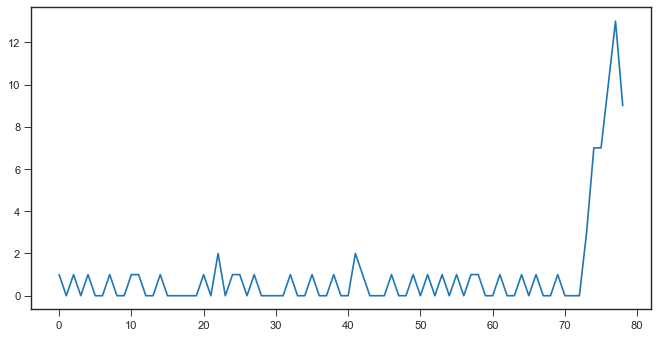

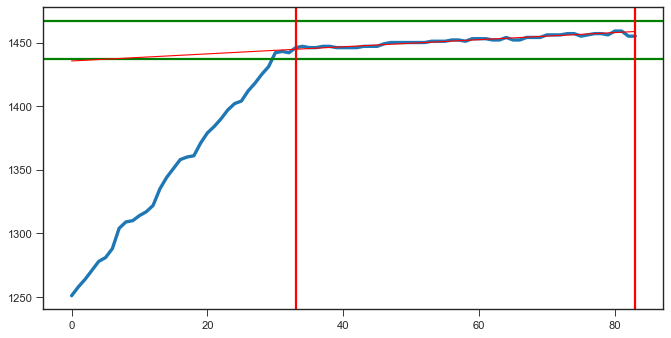

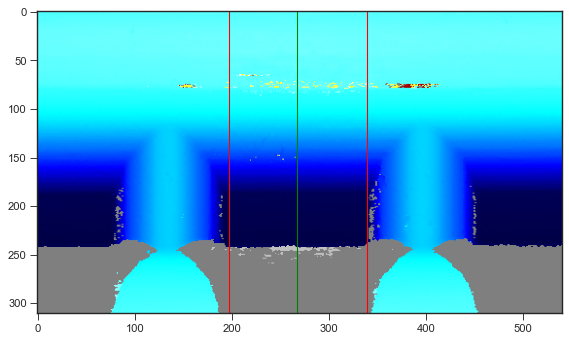

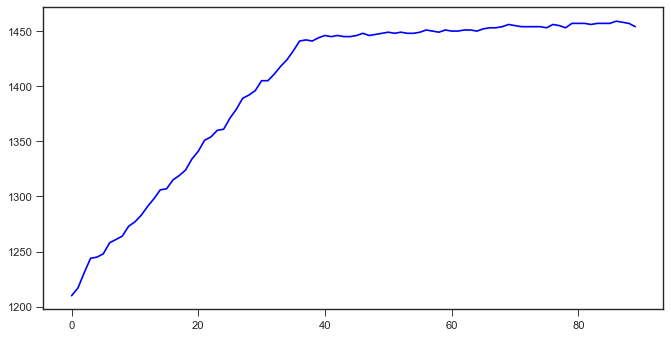

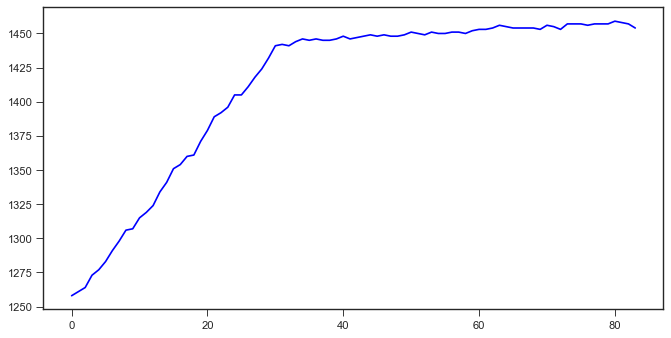

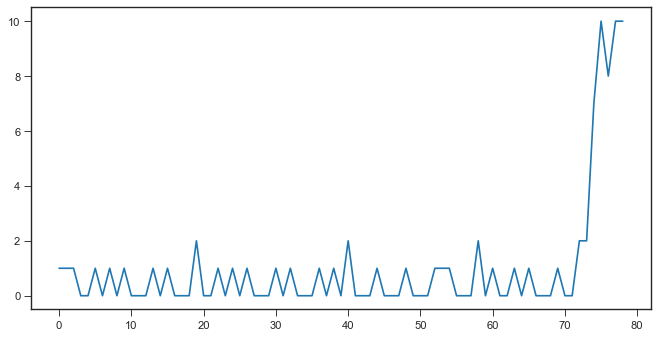

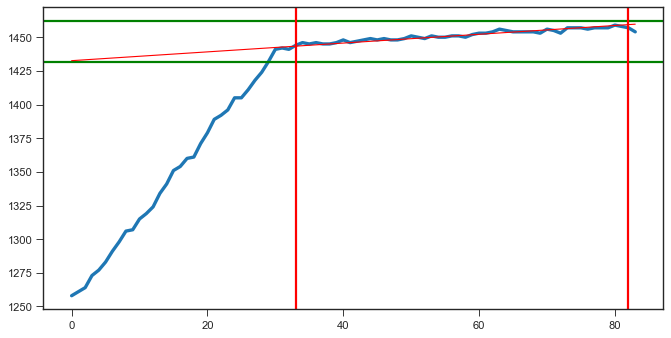

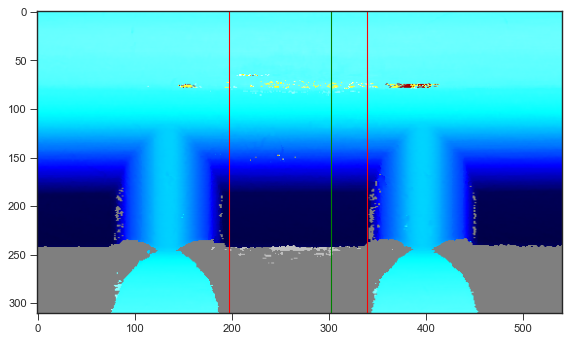

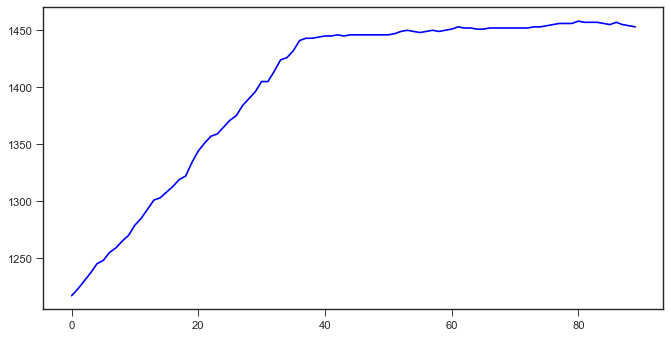

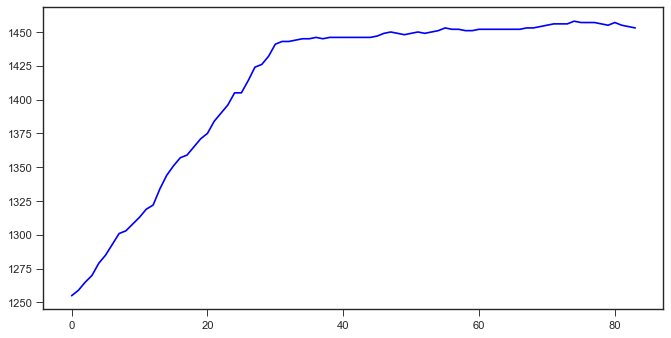

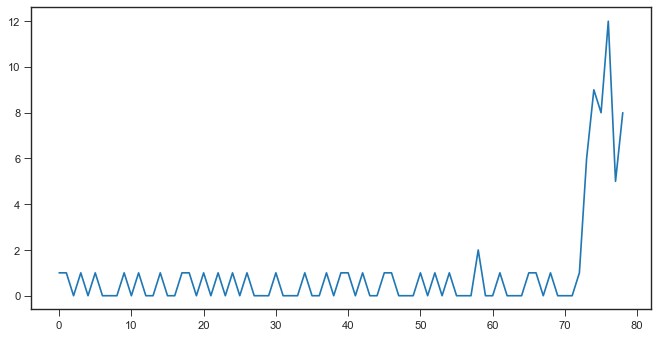

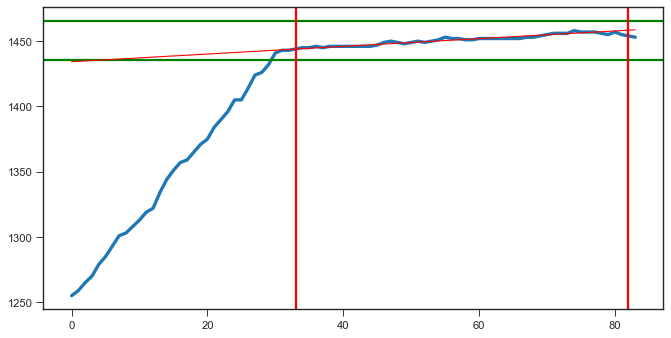

In [20]:
def find_y_limits(reference_line):
    section = []
    for i,v in enumerate(reference_line):
        r,g,b = reference_line[i]
        
        if(r == 255 or (b) == 0 and g == 0):
            section.append((int)(r) + (int)(g) + (int)(b))  
        else:
            section.append(6*255 - r - g - b)

    figure(figsize = (10, 5), dpi=80)
    plt.plot(section,c='b')

    filtred_section = []
    for s in section:
        if s>1250: filtred_section.append(s)
    filtred_section2=filtred_section[0:-5]

    figure(figsize = (10, 5), dpi=80)
    plt.plot(filtred_section,c='b')

    combine_hist = 1
    hist, bins = np.histogram(filtred_section2, bins = int(len(filtred_section2)/combine_hist))

    figure(figsize = (10, 5), dpi=80)
    plt.plot(hist)

    roof = np.where(hist==(max(hist)))[0][0]
    roof = bins[roof]
    offest = 15

    figure(figsize = (10, 5), dpi=80)
    plt.plot(filtred_section,linewidth=3)  
    plt.axhline(y=roof-offest,c='g',linewidth=2)
    plt.axhline(y=roof+offest,c='g',linewidth=2)

    x,y=[],[]
    for i in range(len(filtred_section2)):
        if filtred_section2[i] > roof-offest and filtred_section2[i] < roof+offest:
            x.append(i)
            y.append(filtred_section2[i])

    a, b = np.polyfit(x, y, 1)
    x,y = [],[]
    for i in range (len(filtred_section)):
        x.append(i)
        y.append(a*i+b)

    plt.plot(x,y,c='r',linewidth=1)  

    start_y, stop_y = 0, 0
    for i in range(len(filtred_section)):
        if abs(filtred_section[i] - (a*x[i]+b)) < 5: 
            start_y = i+3
            break
    for i in range(len(filtred_section)):
        if abs(filtred_section[len(filtred_section)-i-1] - (a*x[len(filtred_section)-i-1]+b)) < 5: 
            stop_y = len(filtred_section)-i-1
            break
    plt.axvline(x=start_y,c='r',linewidth=2)
    plt.axvline(x=stop_y,c='r',linewidth=2)
    return a,b,start_y,stop_y

width = stop-start 
sections = [split - int(width/4), split, split +  int(width/4)]
params_y = []
for s in sections:
    reference_line = im[150:240,s]

    figure(figsize = (10, 5), dpi=80)
    plt.axvline(x=start_x,c='r',linewidth=1)
    plt.axvline(x=stop_x,c='r',linewidth=1)
    plt.axvline(x=s,c='g',linewidth=1)
    plt.imshow(im)

    params_y.append(find_y_limits(reference_line))

# Extraction results

(0.27908163265305913, 1435.5010204081632, 33, 83)


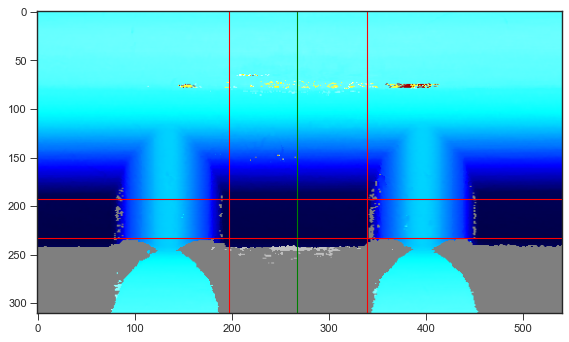

In [21]:
best_params_y = params_y[0]
for p in params_y:
    if p[3]>best_params_y[3]:best_params_y=p
  
print(best_params_y)
a,b,start_y,stop_y = best_params_y
start_y+=10

figure(figsize = (10, 5), dpi=80)
plt.axvline(x=start_x,c='r',linewidth=1)
plt.axvline(x=stop_x,c='r',linewidth=1)
plt.axvline(x=split,c='g',linewidth=1)
plt.axhline(y=start_y+150,c='r',linewidth=1)
plt.axhline(y=stop_y+150,c='r',linewidth=1)
plt.imshow(im)

# Results

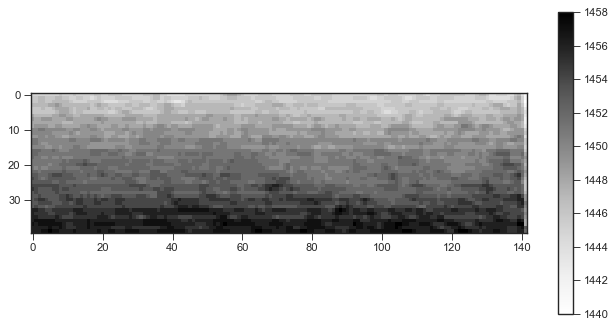

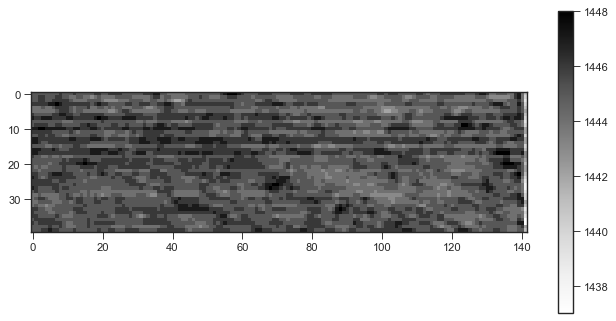

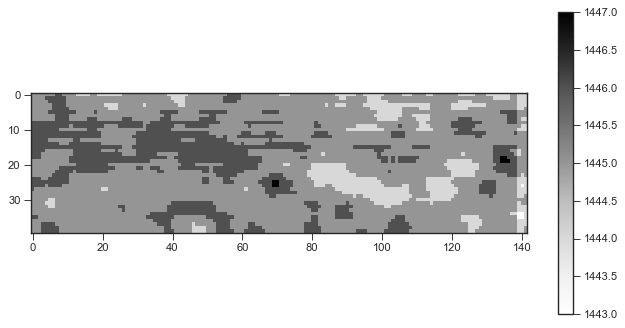

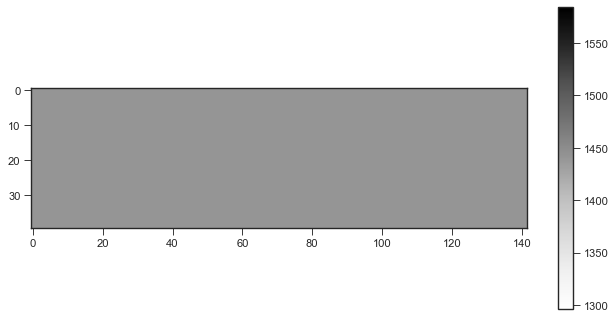

In [22]:
import cv2 as cv
import statistics


figure(figsize = (10, 5), dpi=80)
roi=im[start_y+150:stop_y+150,start_x:stop_x]
r,g,b = cv.split(roi)
sx,sy = r.shape
sum1 = np.zeros(shape=[sx, sy, 1], dtype=np.uint16)

for x in range(sx):
    for y in range(sy):

        if(r[x,y] == 255 or (b[x,y]) == 0 and g[x,y] == 0):
            sum1[x,y] = (int)(r[x,y]) + (int)(g[x,y]) + (int)(b[x,y])  
        else:
            sum1[x,y] = 6*255 - r[x,y] - g[x,y] - b[x,y]

plt.imshow(sum1)
plt.colorbar()

a,b,start_y,stop_y = best_params_y
for x in range(sx):
    for y in range(sy):
        sum1[x][y]=sum1[x][y]-a*x

def flatten(t):
    return [item for sublist in t for item in sublist]


figure(figsize = (10, 5), dpi=80)
plt.imshow(sum1)
plt.colorbar()

sum1v = flatten(sum1)
reference = statistics.median(sum1v)

figure(figsize = (10, 5), dpi=80)
kernel = (5, 5)
sum1 = cv.blur(sum1, kernel) 
plt.imshow(sum1)
plt.colorbar()

figure(figsize = (10, 5), dpi=80)
ret, thresh = cv.threshold(sum1, int(reference)-5, np.amax(sum1), cv.THRESH_TRUNC)
plt.imshow(thresh)
plt.colorbar()



In [23]:
print("Tooth area:",thresh.shape[0]*thresh.shape[1])
max_failure = int(reference - np.amin(sum1))
piksel_defects = 0
for x in range(thresh.shape[0]):
    for y in range(thresh.shape[1]):
        if(thresh[x][y]<int(reference)-5):piksel_defects += 1

print("Piksel defects:",piksel_defects)
percentage = 100*round(piksel_defects/(thresh.shape[0]*thresh.shape[1]),1)
print(percentage,'%')
if(percentage>5):
    print("Failure depth:",max_failure*20/1000,'mm')
else:
    print("No defects")


Tooth area: 5680
Piksel defects: 0
0.0 %
No defects


# Old solution

In [24]:
im = cv.imread(r'I:\220331\img\9.png')
im = cv.cvtColor(im, cv.COLOR_BGR2RGB)
roi = im[100:im.shape[0],330:600]
figure(figsize = (10, 5), dpi=80)
plt.imshow(roi)

error: OpenCV(4.5.5) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


In [ ]:
r,g,b = cv.split(roi)
sx,sy = r.shape
sum1 = np.zeros(shape=[sx, sy, 1], dtype=np.uint16)

for x in range(sx):
    for y in range(sy):

        if(r[x,y] == 255 or (b[x,y]) == 0 and g[x,y] == 0):
            sum1[x,y] = (int)(r[x,y]) + (int)(g[x,y]) + (int)(b[x,y])  
        else:
            sum1[x,y] = 6*255 - r[x,y] - g[x,y] - b[x,y]
                
figure(figsize = (10, 5), dpi=80)
plt.imshow(sum1)
plt.colorbar()
filtered = sum1[sum1 > 0]

print("Max value on the image:",sum1[:].max() ) 
max_val = sum1[:].max()


In [ ]:
import numpy as np 
from scipy.signal import find_peaks

combine_hist = 5
hist, bins = np.histogram(filtered,bins = int(max_val/combine_hist))

peaks, props = find_peaks(hist,threshold=30,distance=35)
print(peaks)

figure(figsize = (20, 5), dpi=80)
for peak in peaks:
    plt.axvline(peak,color='red')
plt.grid(True)
plt.plot(hist)


print("Last peak:",peaks[-1]*combine_hist)
i = peaks[-1]*combine_hist


In [ ]:
tresh = 10
tresh_asymetry = 5

print("Range:",i-tresh,i+tresh)
for x in range(sx):
    for y in range(sy):
        if sum1[x][y]> i+tresh*tresh_asymetry or sum1[x][y]< i-tresh: sum1[x][y]=0

figure(figsize = (20, 10), dpi=80)
plt.imshow(sum1)

In [ ]:
def flatten(t):
    return [item for sublist in t for item in sublist]

sum1v = flatten(sum1)
sum2v = []
for v in sum1v:
    if v>0: sum2v.append(int(v)) 

scale_min = min(sum2v)
scale_max = max(sum2v)
scale_range = scale_max - scale_min + 50

In [ ]:
for x in range(sum1.shape[0]):
    for y in range(sum1.shape[1]):
        v = sum1[x][y]
        if(v>0):
            sum1[x][y] = int((v - scale_min)/scale_range*1400)

In [ ]:
figure(figsize = (15, 15), dpi=80)
plt.imshow(sum1)

In [ ]:
from skspatial.objects import Plane

points = []
for x in range(sum1.shape[0]):
    for y in range(sum1.shape[1]):
        if int(sum1[x][y])>0: points.append([x,y,int(sum1[x][y])])
fitted_plane = Plane.best_fit(points)
p0 = fitted_plane.point
n = fitted_plane.normal

minv = 0
maxv = 0
for x in range(sum1.shape[0]):
    for y in range(sum1.shape[1]):
        if int(sum1[x][y])>0: 
            p = (x,y,sum1[x,y])
            v = ((p[0]-p0[0])*n[0] + (p[1]-p0[1])*n[1] + (p[2]-p0[2])*n[2])*1000
            sum1[x][y]=v
            if v<minv: minv=v
            if v>maxv: maxv=v
            
print(minv)
print(maxv)

In [ ]:
for x in range(sum1.shape[0]):
    for y in range(sum1.shape[1]):
        if sum1[x][y]>0:
            sum1[x][y] = (int(sum1[x][y]) + abs(int(minv)))
            

In [ ]:
figure(figsize = (15, 15), dpi=80)
plt.imshow(sum1[50:150,25:245])

figure(figsize = (15, 15), dpi=80)
plt.imshow(sum1)